In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv("./sample_data/movies.csv")
ratings = pd.read_csv("./sample_data/ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [5]:
movies["genres"] = movies["genres"].apply(lambda x: "etc" if x == "(no genres listed)" else x)

In [6]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [7]:
movies.shape

(34208, 3)

In [8]:
genres_columns = movies["genres"].str.get_dummies('|').columns
genres_columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'etc'],
      dtype='object')

In [9]:
movies = pd.concat([movies.loc[:, ["movieId", "title"]], movies["genres"].str.get_dummies('|')], axis=1)
movies.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [11]:
ratings.shape

(22884377, 4)

In [12]:
np_ratings = ratings.groupby("userId").count()["rating"].to_numpy()
np_ratings = np.sort(np_ratings)
np_ratings[:int((len(np_ratings)*0.8))].max()
bounded_rate = np_ratings[:int((len(np_ratings)*0.8))]

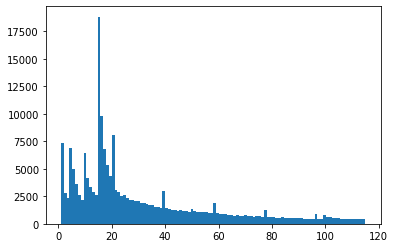

In [13]:
import matplotlib.pyplot as plt
plt.hist(bounded_rate, bins="auto");

In [14]:
lower_bound = np_ratings[int((len(np_ratings)*0.4))]
upper_bound = np_ratings[int((len(np_ratings)*0.6))]
print(lower_bound)
print(upper_bound)

20
44


In [15]:
temp_group = ratings.groupby("userId").count()
filted_userId = temp_group.loc[(temp_group["rating"] > lower_bound) & (temp_group["rating"] < upper_bound)].reset_index()
filted_userId = filted_userId[["userId"]]

In [16]:
temp_group

,movieId,rating,timestamp
userId,,,
1,3,3,3
2,4,4,4
3,4,4,4
4,183,183,183
5,25,25,25
...,...,...,...
247749,5,5,5
247750,70,70,70
247751,190,190,190


In [17]:
filted_userId

,userId
0,5
1,10
2,16
3,19
4,32
...,...
46018,247740
46019,247744
46020,247746
46021,247752


In [18]:
pd.merge(left=filted_userId, right=ratings, on="userId")

,userId,movieId,rating,timestamp
0,5,1203,4.0,1440027024
1,5,2571,2.5,1440027038
2,5,6016,5.0,1440027016
3,5,7502,4.5,1440027020
4,5,58559,4.0,1440027029
...,...,...,...,...
1389050,247753,49530,5.0,1430437962
1389051,247753,69481,3.0,1430437984
1389052,247753,74458,4.0,1430437968
1389053,247753,76093,5.0,1430437811


In [19]:
ratings = pd.merge(left=filted_userId, right=ratings, on="userId")

In [20]:
ratings["userId"].nunique()

46023

In [41]:
userId = list(set(ratings.userId.to_numpy()))
empty_genres = np.zeros((len(userId), len(genres_columns)))

user_pivot_table = pd.DataFrame({"userId":userId}).reset_index(drop=True)
user_pivot_table = pd.concat([user_pivot_table, pd.DataFrame(empty_genres, columns=genres_columns).reset_index(drop=True)], axis=1)
user_pivot_table.sort_values(by="userId", inplace=True)
user_pivot_table.head()

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
temp = movies.drop(["title"], axis=1)
temp.loc[0][genres_columns] = temp.loc[0][genres_columns] + 10
temp

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
0,1,10,11,11,11,11,10,10,10,11,...,10,10,10,10,10,10,10,10,10,10
1,2,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34203,151697,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34204,151701,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34205,151703,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34206,151709,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
movies.loc[movies.movieId == 1]

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
ratings.loc[ratings["userId"] == 1]

,userId,movieId,rating,timestamp


In [45]:
temp = pd.merge(left=ratings.loc[ratings["userId"] == 5], right=movies, on="movieId")
temp

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
0,5,1203,4.0,1440027024,12 Angry Men (1957),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,2571,2.5,1440027038,"Matrix, The (1999)",1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,5,6016,5.0,1440027016,City of God (Cidade de Deus) (2002),1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,7502,4.5,1440027020,Band of Brothers (2001),1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,58559,4.0,1440027029,"Dark Knight, The (2008)",1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,5,79132,3.0,1440027049,Inception (2010),1,0,0,0,0,...,0,1,0,1,0,1,1,0,0,0
6,5,92259,4.5,1440026883,Intouchables (2011),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,5,112183,4.0,1440026932,Birdman: Or (The Unexpected Virtue of Ignoranc...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,5,112552,4.5,1440026900,Whiplash (2014),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,112556,4.5,1440026907,Gone Girl (2014),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
temp[["rating"]].to_numpy()

array([[4. ],
       [2.5],
       [5. ],
       [4.5],
       [4. ],
       [3. ],
       [4.5],
       [4. ],
       [4.5],
       [4.5],
       [4. ],
       [1.5],
       [2.5],
       [3.5],
       [4. ],
       [3. ],
       [4.5],
       [4. ],
       [2.5],
       [3.5],
       [3. ],
       [0.5],
       [4.5],
       [1.5],
       [3.5]])

In [47]:
temp[genres_columns].to_numpy()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0,

In [48]:
temp[["rating"]].to_numpy() * temp[genres_columns].to_numpy()

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 2.5, 2.5, 0. , 0. , 0. ],
       [5. , 5. , 0. , 0. , 0. , 5. , 0. , 5. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 5. , 0. , 0. , 0. ],
       [4.5, 0. , 0. , 0. , 0. , 0. , 0. , 4.5, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 4.5, 0. , 0. ],
       [4. , 0. , 0. , 0. , 0. , 4. , 0. , 4. , 0. , 0. , 0. , 4. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [3. , 0. , 0. , 0. , 0. , 3. , 0. , 3. , 0. , 0. , 0. , 3. , 0. ,
        3. , 0. , 3. , 3. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 4.5, 0. , 0. , 4.5, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 4. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 4.5, 0. , 0. , 0. , 0

In [49]:
temp = pd.merge(left=ratings, right=movies, on="movieId")
temp.head()

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
0,5,1203,4.0,1440027024,12 Angry Men (1957),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,245,1203,5.0,1314950556,12 Angry Men (1957),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,367,1203,5.0,1285166480,12 Angry Men (1957),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,736,1203,4.5,1336715640,12 Angry Men (1957),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2067,1203,4.0,1380624651,12 Angry Men (1957),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
temp.loc[temp["userId"] == 5][["rating"]].to_numpy()

array([[4. ],
       [2.5],
       [5. ],
       [4.5],
       [4. ],
       [3. ],
       [4.5],
       [4. ],
       [4.5],
       [4.5],
       [4. ],
       [1.5],
       [2.5],
       [3.5],
       [4. ],
       [3. ],
       [4.5],
       [4. ],
       [2.5],
       [3.5],
       [3. ],
       [0.5],
       [4.5],
       [1.5],
       [3.5]])

In [51]:
temp.loc[temp["userId"] == 5][genres_columns].to_numpy()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0,

In [52]:
a = temp.loc[temp["userId"] == 5][["rating"]].to_numpy() * temp.loc[temp["userId"] == 5][genres_columns].to_numpy()
b = np.sum(a, axis=0)
b

array([41. , 16. ,  3. ,  3. , 25.5, 21. ,  0. , 59.5,  3. ,  0. ,  0. ,
        7. ,  0. ,  4.5,  1.5, 16. , 32.5, 15. ,  0. ,  0. ])

In [53]:
user_pivot_table

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43356,247740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43358,247744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43359,247746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43361,247752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
id = 5
rate = temp.loc[temp["userId"] == id][["rating"]].to_numpy()
genres = temp.loc[temp["userId"] == id][genres_columns].to_numpy()    
x = rate * genres
user_pivot_table.loc[user_pivot_table["userId"] == id, genres_columns] = (np.sum(x, axis=0) - np.mean(x))/np.std(x)

In [58]:
x_sum = np.sum(x, axis=0)



array([41. , 16. ,  3. ,  3. , 25.5, 21. ,  0. , 59.5,  3. ,  0. ,  0. ,
        7. ,  0. ,  4.5,  1.5, 16. , 32.5, 15. ,  0. ,  0. ])

In [59]:
(x_sum - np.min(x_sum))/(np.max(x_sum) - np.min(x_sum))

array([0.68907563, 0.26890756, 0.05042017, 0.05042017, 0.42857143,
       0.35294118, 0.        , 1.        , 0.05042017, 0.        ,
       0.        , 0.11764706, 0.        , 0.07563025, 0.02521008,
       0.26890756, 0.54621849, 0.25210084, 0.        , 0.        ])

In [60]:
user_pivot_table

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
1,5,31.613162,12.10031,1.953627,1.953627,19.515194,16.00288,-0.387916,46.052673,1.953627,...,-0.387916,5.075683,-0.387916,3.124398,0.782856,12.10031,24.978792,11.319796,-0.387916,-0.387916
3,10,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,16,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,19,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
12,32,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43356,247740,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
43358,247744,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
43359,247746,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
43361,247752,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [62]:
genres = movies.drop(["title", "movieId"], axis=1)
for id in userId:        
    #id, movieId, rate = ratings.loc[idx]["userId"],  ratings.loc[idx]["movieId"], ratings.loc[idx]["rating"]    
    rate = temp.loc[temp["userId"] == id][["rating"]].to_numpy()
    genres = temp.loc[temp["userId"] == id][genres_columns].to_numpy()    
    
    x = np.sum(rate * genres, axis=0)
    user_pivot_table.loc[user_pivot_table["userId"] == id, genres_columns] = (x - np.min(x))/(np.max(x) - np.min(x))

In [64]:
user_pivot_table

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
1,5,0.689076,0.268908,0.050420,0.050420,0.428571,0.352941,0.000000,1.000000,0.050420,...,0.000000,0.117647,0.000000,0.075630,0.025210,0.268908,0.546218,0.252101,0.000000,0.0
3,10,1.000000,0.964706,0.188235,0.188235,0.905882,0.152941,0.000000,0.941176,0.470588,...,0.094118,0.164706,0.000000,0.094118,0.529412,0.494118,0.470588,0.188235,0.082353,0.0
6,16,0.337500,0.162500,0.000000,0.000000,0.187500,0.062500,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.050000,0.000000,0.350000,0.050000,0.112500,0.587500,0.062500,0.0
7,19,0.711409,1.000000,0.449664,0.449664,0.442953,0.234899,0.000000,0.375839,0.409396,...,0.000000,0.409396,0.000000,0.067114,0.167785,0.348993,0.120805,0.000000,0.000000,0.0
12,32,0.518987,0.329114,0.139241,0.253165,0.658228,0.430380,0.000000,1.000000,0.240506,...,0.025316,0.088608,0.139241,0.177215,0.443038,0.215190,0.962025,0.215190,0.088608,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43356,247740,0.440000,0.460000,0.060000,0.180000,0.900000,0.160000,0.000000,1.000000,0.160000,...,0.240000,0.000000,0.080000,0.140000,0.180000,0.420000,0.080000,0.000000,0.000000,0.0
43358,247744,0.357143,0.452381,0.166667,0.166667,1.000000,0.071429,0.000000,0.690476,0.261905,...,0.166667,0.000000,0.000000,0.000000,0.309524,0.071429,0.285714,0.000000,0.000000,0.0
43359,247746,1.000000,0.795181,0.084337,0.108434,0.530120,0.325301,0.000000,0.518072,0.192771,...,0.036145,0.000000,0.036145,0.084337,0.192771,0.469880,0.939759,0.000000,0.000000,0.0
43361,247752,0.710843,0.301205,0.180723,0.240964,0.686747,0.674699,0.120482,1.000000,0.277108,...,0.144578,0.000000,0.084337,0.204819,0.192771,0.277108,0.698795,0.277108,0.000000,0.0


In [66]:
user_pivot_table = user_pivot_table.reset_index(drop=True)
user_pivot_table.head()

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,etc
0,5,0.689076,0.268908,0.050420,0.050420,0.428571,0.352941,0.0,1.000000,0.050420,...,0.000000,0.117647,0.000000,0.075630,0.025210,0.268908,0.546218,0.252101,0.000000,0.0
1,10,1.000000,0.964706,0.188235,0.188235,0.905882,0.152941,0.0,0.941176,0.470588,...,0.094118,0.164706,0.000000,0.094118,0.529412,0.494118,0.470588,0.188235,0.082353,0.0
2,16,0.337500,0.162500,0.000000,0.000000,0.187500,0.062500,0.0,1.000000,0.000000,...,0.000000,0.000000,0.050000,0.000000,0.350000,0.050000,0.112500,0.587500,0.062500,0.0
3,19,0.711409,1.000000,0.449664,0.449664,0.442953,0.234899,0.0,0.375839,0.409396,...,0.000000,0.409396,0.000000,0.067114,0.167785,0.348993,0.120805,0.000000,0.000000,0.0
4,32,0.518987,0.329114,0.139241,0.253165,0.658228,0.430380,0.0,1.000000,0.240506,...,0.025316,0.088608,0.139241,0.177215,0.443038,0.215190,0.962025,0.215190,0.088608,0.0


In [67]:
user_pivot_table.to_csv("./pivot_table.csv")

In [212]:
user_pivot_table.loc[0, genres_columns].to_numpy()

array([0.68907563, 0.26890756, 0.05042017, 0.05042017, 0.42857143,
       0.35294118, 0.        , 1.        , 0.05042017, 0.        ,
       0.        , 0.11764706, 0.        , 0.07563025, 0.02521008,
       0.26890756, 0.54621849, 0.25210084, 0.        , 0.        ])

In [213]:
user_pivot_table.loc[:1000, genres_columns].to_numpy().shape

(1001, 20)

In [214]:
src_list = np.random.randint(0, len(user_pivot_table)-1, size=1000)
src_list[:10]

array([ 8240,   577, 36359,  5073, 28558, 42970, 23568,  7707, 37536,
       38075])

In [215]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(user_pivot_table.loc[src_list, genres_columns])
similarity

array([[1.        , 0.84379882, 0.92426774, ..., 0.89813425, 0.67104593,
        0.82048041],
       [0.84379882, 1.        , 0.89211627, ..., 0.9406754 , 0.83610219,
        0.95657151],
       [0.92426774, 0.89211627, 1.        , ..., 0.90241166, 0.6961744 ,
        0.89839799],
       ...,
       [0.89813425, 0.9406754 , 0.90241166, ..., 1.        , 0.861702  ,
        0.93068054],
       [0.67104593, 0.83610219, 0.6961744 , ..., 0.861702  , 1.        ,
        0.8352513 ],
       [0.82048041, 0.95657151, 0.89839799, ..., 0.93068054, 0.8352513 ,
        1.        ]])

# 213, 339

In [216]:
arg_list = np.argsort(similarity[0])[::-1][:10]
arg_list

array([  0,  24, 206, 648, 880, 433, 309, 156, 763, 411])

In [217]:
src_list[arg_list[0]]

8240

In [218]:
src_list[arg_list[1]]

20702

In [219]:
src_userId =  user_pivot_table.iloc[src_list[arg_list[0]]]["userId"]
src_userId

45204.0

In [220]:
target_userId = user_pivot_table.iloc[src_list[arg_list[1]]]["userId"]
target_userId

112109.0

In [221]:
left = pd.merge(left=ratings.loc[ratings["userId"] == src_userId], right=movies, on="movieId").loc[:, ["userId", "movieId", "title", "rating"]]
left

,userId,movieId,title,rating
0,45204,16,Casino (1995),4.0
1,45204,186,Nine Months (1995),3.0
2,45204,236,French Kiss (1995),1.0
3,45204,296,Pulp Fiction (1994),4.5
4,45204,356,Forrest Gump (1994),5.0
5,45204,432,City Slickers II: The Legend of Curly's Gold (...,2.5
6,45204,457,"Fugitive, The (1993)",4.0
7,45204,480,Jurassic Park (1993),4.0
8,45204,592,Batman (1989),3.5
9,45204,593,"Silence of the Lambs, The (1991)",4.5


In [222]:
right = pd.merge(left=ratings.loc[ratings["userId"] == target_userId], right=movies, on="movieId").loc[:, ["userId", "movieId", "title", "rating"]]
right

,userId,movieId,title,rating
0,112109,11,"American President, The (1995)",3.0
1,112109,17,Sense and Sensibility (1995),5.0
2,112109,21,Get Shorty (1995),5.0
3,112109,39,Clueless (1995),5.0
4,112109,50,"Usual Suspects, The (1995)",4.0
5,112109,110,Braveheart (1995),3.0
6,112109,141,"Birdcage, The (1996)",5.0
7,112109,150,Apollo 13 (1995),4.0
8,112109,153,Batman Forever (1995),3.0
9,112109,161,Crimson Tide (1995),5.0


In [223]:
pd.merge(left=left, right=right, on="movieId")

,userId_x,movieId,title_x,rating_x,userId_y,title_y,rating_y
0,45204,236,French Kiss (1995),1.0,112109,French Kiss (1995),5.0
1,45204,356,Forrest Gump (1994),5.0,112109,Forrest Gump (1994),5.0
2,45204,432,City Slickers II: The Legend of Curly's Gold (...,2.5,112109,City Slickers II: The Legend of Curly's Gold (...,3.0
3,45204,457,"Fugitive, The (1993)",4.0,112109,"Fugitive, The (1993)",4.0
4,45204,480,Jurassic Park (1993),4.0,112109,Jurassic Park (1993),4.0
5,45204,592,Batman (1989),3.5,112109,Batman (1989),3.0
6,45204,593,"Silence of the Lambs, The (1991)",4.5,112109,"Silence of the Lambs, The (1991)",4.0
